In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def count_messages(file: str) -> dict:
    """Count the number of messages per user in a file."""
    counter = {"ALIVE_MSG": 0, "ALGORITHM": 0, "TERMINATION": 0, "START_TIME": None, "END_TIME": None}
    
    num_lines = sum(1 for line in open(file))  # get number of lines in file
    
    with open(file, 'r') as f:
        for index, line in enumerate(f):
            line_strings = line.replace("\n", "").split(" ")
            if line_strings[-1] in counter:
                counter[line_strings[-1]] += 1

            # get start time
            if counter["START_TIME"] == None and index == 1:
                counter["START_TIME"] = line_strings[2]

            # if last line in file, get end time
            if index == num_lines - 1:
                counter["END_TIME"] = line_strings[2]
    return counter

In [3]:
# iterate over all files in logs/
counters = {}
for file in os.listdir("logs/"):
    if file.endswith(".log"):
        counters[file] = count_messages("logs/" + file)

In [4]:
# create a pandas dataframe from the counters
df = pd.DataFrame.from_dict(counters, orient='index')

In [5]:
df.head()

,ALIVE_MSG,ALGORITHM,TERMINATION,START_TIME,END_TIME
1.log,37,74,38,"01:01:41,","01:01:44,"
10.log,100,200,101,"01:02:57,","01:03:07,"
100.log,19,38,20,"01:16:59,","01:17:00,"
101.log,43,86,44,"01:17:01,","01:17:06,"
102.log,88,176,89,"01:17:07,","01:17:15,"


In [6]:
df.sort_values(by=['ALIVE_MSG'], inplace=True, ascending=True)
df.head()

,ALIVE_MSG,ALGORITHM,TERMINATION,START_TIME,END_TIME
141.log,19,38,20,"01:22:51,","01:22:52,"
100.log,19,38,20,"01:16:59,","01:17:00,"
90.log,22,44,23,"01:15:38,","01:15:40,"
9.log,22,44,23,"01:02:54,","01:02:56,"
147.log,22,44,23,"01:23:38,","01:23:40,"


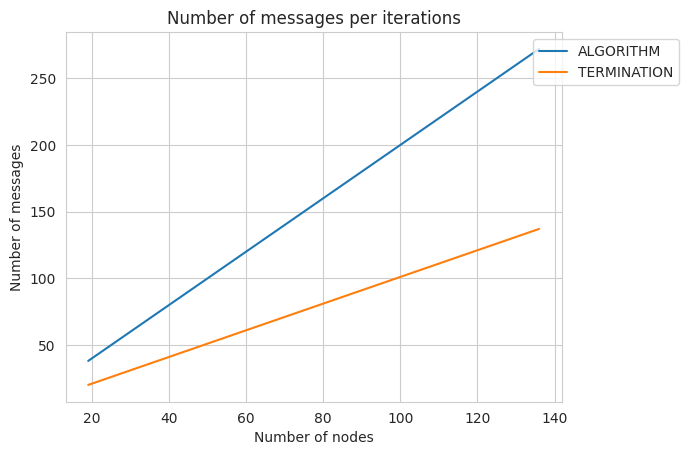

In [7]:
# set style
sns.set_style("whitegrid")

df.plot(x="ALIVE_MSG", y=["ALGORITHM", "TERMINATION"])

# set title
plt.title("Number of messages per iterations")

# set x label
plt.xlabel("Number of nodes")

# set y label
plt.ylabel("Number of messages")

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)

plt.show()

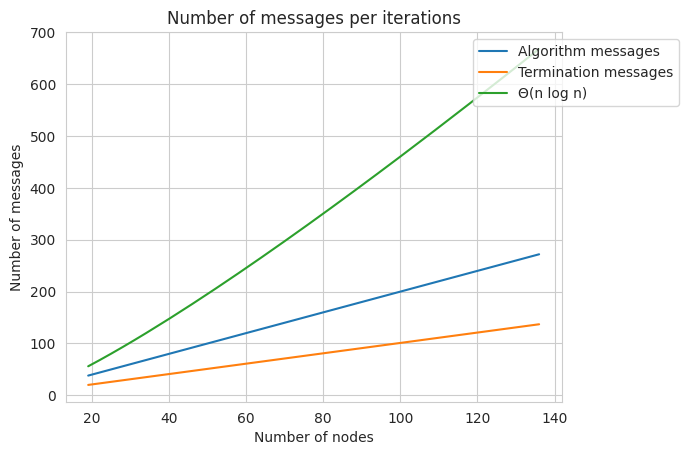

In [8]:
df.plot(x="ALIVE_MSG", y=["ALGORITHM", "TERMINATION"])

# add n * log(n) function to the same plot where n is the ALIVE_MSG
x = df["ALIVE_MSG"]

y = x * np.log(x)
plt.plot(x, y)

# set title
plt.title("Number of messages per iterations")

# set x label
plt.xlabel("Number of nodes")

# set y label
plt.ylabel("Number of messages")

plt.legend(["Algorithm messages", "Termination messages", "Θ(n log n)"], loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)


plt.show()

In [9]:
# get the time difference between start and end time
df["TIME_DIFF"] = pd.to_datetime(df["END_TIME"]) - pd.to_datetime(df["START_TIME"])
df.tail()

,ALIVE_MSG,ALGORITHM,TERMINATION,START_TIME,END_TIME,TIME_DIFF
119.log,133,266,134,"01:19:41,","01:19:54,",0 days 00:00:13
61.log,133,266,134,"01:11:34,","01:11:48,",0 days 00:00:14
126.log,136,272,137,"01:20:39,","01:20:52,",0 days 00:00:13
115.log,136,272,137,"01:18:59,","01:19:13,",0 days 00:00:14
82.log,136,272,137,"01:14:18,","01:14:31,",0 days 00:00:13


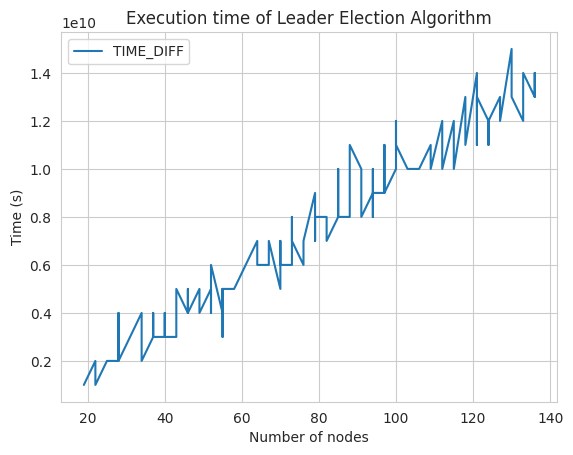

In [10]:
df.plot(x="ALIVE_MSG", y=["TIME_DIFF"])
# set title
plt.title("Execution time of Leader Election Algorithm")

# set x label
plt.xlabel("Number of nodes")

# set y label
plt.ylabel("Time (s)")

plt.show()

<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>
